In [125]:
import os.path as op
import pandas as pd
import numpy as np

In [126]:
root = '/data/thesis/Hotels-50K/input/dataset'

In [127]:
hinfo = pd.read_csv(op.join(root, 'hotel_info.csv'))

In [128]:
hinfo.head()

,hotel_id,hotel_name,chain_id,latitude,longitude
0,391,Extended Stay America - Fairbanks - Old Airpor...,72,64.83538,-147.82330
1,392,Hilton Hangzhou Qiandao Lake Resort,3,29.60819,119.07290
2,393,Taj Lands End,-1,19.04391,72.81879
3,395,Cambridge Suites Hotel Sydney,-1,46.13663,-60.19551
4,396,Tamanu Beach,14,-18.84213,-159.78794


In [129]:
hotels_to_chain = hinfo[['hotel_id', 'chain_id']]
hotels_to_chain.index = hotels_to_chain['hotel_id']
hotels_to_chain = hotels_to_chain['chain_id']
hotels_to_chain.head()

hotel_id
391    72
392     3
393    -1
395    -1
396    14
Name: chain_id, dtype: int64

In [130]:
hotels_to_chain[391]

72

In [131]:
hotels_per_chain = hinfo.groupby(['chain_id']).agg({'hotel_id': 'count'})
hotels_per_chain.head()

,hotel_id
chain_id,
-1,27519
0,998
1,381
2,571
3,404


In [132]:
df = pd.read_csv(op.join(root, 'train_set.csv'), header=None)
df.columns = ['id', 'hotel_id', 'url', 'source', 'date']
df['chain_id'] = hotels_to_chain[df.hotel_id].values
df.head()

,id,hotel_id,url,source,date,chain_id
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,3
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,3
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33,2
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,76
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,-1


In [133]:
photos_per_hotel = df.groupby(['hotel_id']).agg({'url': 'count'})
photos_per_hotel.head()

,url
hotel_id,
391,7
392,33
393,24
395,13
396,26


In [134]:
photos_per_hotel.sum()

url    1124215
dtype: int64

In [135]:
photos_per_hotel[photos_per_hotel >= 10].sum()

url    1084593.0
dtype: float64

In [136]:
photos_per_chain = df.groupby(['chain_id']).agg({'url': 'count'})
photos_per_chain.head()

,url
chain_id,
-1,657626
0,22517
1,8636
2,14761
3,15214


In [137]:
photos_per_chain[photos_per_chain >= 100].sum()

url    1124129.0
dtype: float64

In [138]:
photos_per_chain

,url
chain_id,
-1,657626
0,22517
1,8636
2,14761
3,15214
...,...
88,18773
89,7325
90,8906


In [139]:
photos_per_chain[(photos_per_chain.reset_index()['url'] < 100).values]

,url
chain_id,
40,41
53,30
55,15


* Remove hotels with < 10 photos
* Remove chains with < 100 photos

In [140]:
bad_chains = set(photos_per_chain[(photos_per_chain.reset_index()['url'] < 100).values].index)
bad_chains

{40, 53, 55}

In [141]:
bad_chain_hotels = []
for chain in bad_chains:
    chain_hotels = hinfo[['hotel_id', 'chain_id']][hinfo['chain_id'] == chain]
    bad_chain_hotels += list(chain_hotels['hotel_id'])
bad_chain_hotels

[40868, 23823, 309768]

In [142]:
bad_hotels = list(photos_per_hotel[(photos_per_hotel.reset_index()['url'] < 10).values].index)
list(bad_hotels)[:10]

[391, 415, 423, 425, 432, 438, 459, 461, 507, 521]

In [143]:
bad_hotels += bad_chain_hotels

In [144]:
'Bad, bad hotels', len(bad_hotels)

('Bad, bad hotels', 5435)

In [145]:
n_bad_hotel_pics = df[df.hotel_id.isin(bad_hotels)].shape[0]

In [146]:
'Remaining images', df.shape[0] - n_bad_hotel_pics

('Remaining images', 1084507)

In [147]:
df = df[~df.hotel_id.isin(bad_hotels)]

In [148]:
df.hotel_id.value_counts()

25050     474
10365     393
6798      328
34541     307
17211     280
         ... 
207942     10
23037      10
43207      10
39723      10
28220      10
Name: hotel_id, Length: 44565, dtype: int64

In [159]:
subset_df = df.sample(int(0.1*df.shape[0]))

In [160]:
subset_df.shape

(108450, 6)

In [161]:
subset_df.hotel_id.value_counts()

25050    57
6798     37
29731    36
1240     35
10365    35
         ..
12569     1
26898     1
78073     1
4317      1
30959     1
Name: hotel_id, Length: 38291, dtype: int64

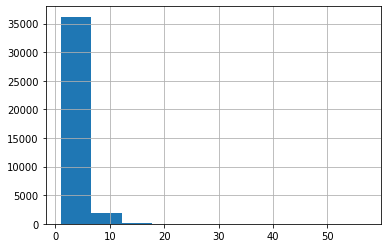

In [166]:
subset_df.hotel_id.value_counts().hist()

In [171]:
'Remaining hotels', len(subset_df.hotel_id.value_counts().index)

('Remaining hotels', 38291)

In [172]:
'Remaining images', subset_df.hotel_id.value_counts().sum()

('Remaining images', 108450)